# Model Testing

# Import Libraries & Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression 
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, balanced_accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, VotingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier


# Read in the Data

In [3]:
#Loading in the data 
# Starting with mnb = Multinomial Naive Bayes

combo_clean = pd.read_csv('/Users/khalildavis/Desktop/General Assembly Work/Submissions/Projects/project-3-master/Project 3 Submission/Data/combo_clean.csv')
combo_clean.head() 

,title,auth,subreddit,text,is_asktransgender
0,What's the difference between transitioning wo...,SnooChocolates8273,asktransgender,When I look at a beautiful woman I see a beaut...,1
1,Did you also have this?,HoldTheStocks2,asktransgender,When I was like 10-14 I was searching all over...,1
2,How many times a week do you dilatate?,Kind_Lemon,asktransgender,"Hello!\n\nI am seven years post-surgical MtF, ...",1
3,Coming out to my mother (again),mwnahas,asktransgender,Ive already done it about 1.5 years ago. She w...,1
4,Foot hurts is it hrt,Anastasia69Sanchez,asktransgender,I heard foot gets smaller . Idk if I'm getting...,1


# Additional Cleaning*

*Please read the observation below*

**Observation:**
Now this is weird to me because if you check the cleaning notebook, I doubled check befored I combined my two dataframes together and saved it to a csv file. I double checked if there were any missing when they we seperated and after I combined them. Yet, it shows within the info that in title there are 'NaN's inside the title column. Either way, I corrected it by using dropna. I dropped because I still have a lot of data to work with. 

In [4]:
combo_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12318 entries, 0 to 12317
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              12299 non-null  object
 1   auth               12318 non-null  object
 2   subreddit          12318 non-null  object
 3   text               12318 non-null  object
 4   is_asktransgender  12318 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 481.3+ KB


In [5]:
combo_clean.isna().sum()

title                19
auth                  0
subreddit             0
text                  0
is_asktransgender     0
dtype: int64

In [6]:
combo_clean.dropna(inplace=True)

In [7]:
#To check if the rows were dropped from the df

combo_clean.isna().sum()

title                0
auth                 0
subreddit            0
text                 0
is_asktransgender    0
dtype: int64

# Setting up Train-Test-Split 

In [8]:
#Checking out to see if my data is balanced before I train-test-split
combo_clean['subreddit'].value_counts()

asktransgender    6289
ainbow            6010
Name: subreddit, dtype: int64

**Observation:**
I've decided to use the 'title' column for my X because within both datasets the titles have more reliable text in them than the text column itself, especially in the rainbow data frame. I've mentioned in the cleaning notebook that 43% of my data was filled with NaN's or '[removed]' or '[deleted]' yet their titles wasare still intact. 

In [10]:
#Extracting feature array of X using only the 'title'

X = combo_clean['title']

In [11]:
#Definging my y because this is the target for my models

y = combo_clean['is_asktransgender']

In [12]:
#Splitting the data for default split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, stratify=y)

# The Null Model

In [13]:
# See how the null model compared

null_model = DummyClassifier()
null_model.fit(X_train, y_train)
null_model.score(X_test, y_test)

0.511219512195122

**Observation:**
The null model that I will compare all my models too. I used the quick method of a Dummy Classifier. Since, my data of the two dataframes are close, the null model accuracy classifier is at 51%.

# CountVectorizer with Multinomial Naive Bayes 

In [14]:
#Instantiate CountVectorizer & MultinomialNB
cvect = CountVectorizer(stop_words='english')
nbayes = MultinomialNB()

#Using a pipeline to expedite the model with params
pipe1 = make_pipeline(
cvect,
nbayes
)

#Choice of params
params1 = {
    'countvectorizer__max_df':[0.9, 1],
    'countvectorizer__min_df':[0],
    'countvectorizer__ngram_range':[(1,2),(1,3)],
    'multinomialnb__alpha':[0.1, 2],

}

#Decided to do a gridsearch because I want to find the best model possible
gs = GridSearchCV(pipe1, params1, n_jobs=-1)

#Fitting the model
gs.fit(X_train, y_train) 

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_df': [0.9, 1],
                         'countvectorizer__min_df': [0],
                         'countvectorizer__ngram_range': [(1, 2), (1, 3)],
                         'multinomialnb__alpha': [0.1, 2]})

In [15]:
#Reviewing the results & turn into a dataframe
gs.cv_results_

pd.DataFrame(gs.cv_results_).loc[:, ['params', 'mean_test_score']].sort_values(by='mean_test_score')

,params,mean_test_score
5,"{'countvectorizer__max_df': 1, 'countvectorize...",0.633782
4,"{'countvectorizer__max_df': 1, 'countvectorize...",0.634107
7,"{'countvectorizer__max_df': 1, 'countvectorize...",0.636818
6,"{'countvectorizer__max_df': 1, 'countvectorize...",0.637360
2,"{'countvectorizer__max_df': 0.9, 'countvectori...",0.817216
0,"{'countvectorizer__max_df': 0.9, 'countvectori...",0.818951
1,"{'countvectorizer__max_df': 0.9, 'countvectori...",0.830009
3,"{'countvectorizer__max_df': 0.9, 'countvectori...",0.831201


In [18]:
#Curious to see what the best params are
gs.best_params_

{'countvectorizer__max_df': 0.9,
 'countvectorizer__min_df': 0,
 'countvectorizer__ngram_range': (1, 3),
 'multinomialnb__alpha': 2}

In [19]:
#Getting the testing score
gs.score(X_test, y_test)

0.8204878048780487

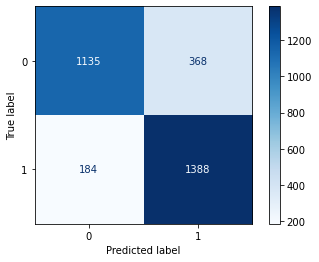

In [20]:
#Ask_transgender = 1, rainbow = 0
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap='Blues');

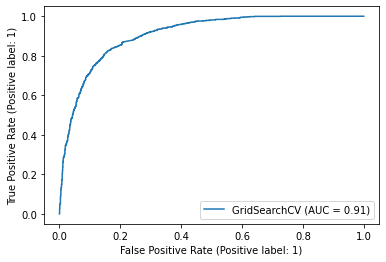

In [21]:
RocCurveDisplay.from_estimator(gs, X_test, y_test);

**Observation:**
For using two subreddits that are very similiar and with the data I pulled, I believe this is a great model. The alpha range of 2 helped with lap smoothing the model.

# Tfidf with Simple LogisticRegression

In [29]:
#Instantiate TfidfVectorizer & Logisticression
tfidf_vect = TfidfVectorizer(stop_words='english')
logreg = LogisticRegression()

#Using a pipeline to expedite the model with params
pipe10 = make_pipeline(
tfidf_vect,
logreg
)

#Choice of params
params10 = {
"tfidfvectorizer__stop_words": ['english'],
"tfidfvectorizer__max_features": [10_000],
"tfidfvectorizer__ngram_range": [(1,2),(1,3)],  
}

#Decided to do a gridsearch because I want to find the best model possible
gs10 = GridSearchCV(pipe10, params10, n_jobs=-1)

#Fitting the model
gs10.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(stop_words='english')),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'tfidfvectorizer__max_features': [10000],
                         'tfidfvectorizer__ngram_range': [(1, 2), (1, 3)],
                         'tfidfvectorizer__stop_words': ['english']})

In [30]:
gs10.cv_results_

pd.DataFrame(gs10.cv_results_).loc[:, ['params', 'mean_test_score']].sort_values(by='mean_test_score')

,params,mean_test_score
1,"{'tfidfvectorizer__max_features': 10000, 'tfid...",0.829250
0,"{'tfidfvectorizer__max_features': 10000, 'tfid...",0.830009


In [31]:
gs10.score(X_test, y_test)

0.8201626016260163

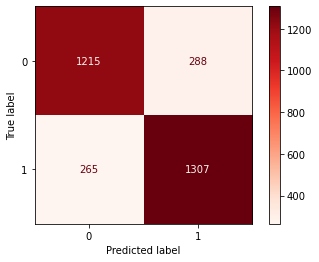

In [32]:
#Ask_transgender = 1, rainbow = 0
ConfusionMatrixDisplay.from_estimator(gs10, X_test, y_test, cmap='Reds');

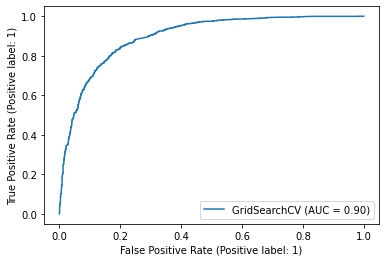

In [33]:
RocCurveDisplay.from_estimator(gs10, X_test, y_test);

**Observation:**
This model which is different only slightly from the countvectorizer with MNB. Since it includes Tfidf and simple Logistic Regression as you can see above there is no hyperparameter for the model. Yet, the area under of the curve is still 0.90 and was able to get 82% accuracy in comparison.

# Countvectorizer with Simple Logistic Regression

In [22]:
#Instantiate CountVectorizer & Logisticression
cvect = CountVectorizer(stop_words='english')
logreg = LogisticRegression()

#Using a pipeline to expedite the model with params
pipe9 = make_pipeline(
cvect,
logreg
)

#Choice of params
params9 = {
    'countvectorizer__max_df':[0.9, 1],
    'countvectorizer__min_df':[0],
    'countvectorizer__ngram_range':[(1,2),(1,3)],
    
}

#Decided to do a gridsearch because I want to find the best model possible
gs9 = GridSearchCV(pipe9, params9, n_jobs=-1)

#Fitting the model
gs9.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_df': [0.9, 1],
                         'countvectorizer__min_df': [0],
                         'countvectorizer__ngram_range': [(1, 2), (1, 3)]})

In [23]:
gs9.cv_results_

pd.DataFrame(gs9.cv_results_).loc[:, ['params', 'mean_test_score']].sort_values(by='mean_test_score')

,params,mean_test_score
3,"{'countvectorizer__max_df': 1, 'countvectorize...",0.601042
2,"{'countvectorizer__max_df': 1, 'countvectorize...",0.613725
1,"{'countvectorizer__max_df': 0.9, 'countvectori...",0.823504
0,"{'countvectorizer__max_df': 0.9, 'countvectori...",0.825130


In [24]:
gs9.score(X_test, y_test)

0.8191869918699187

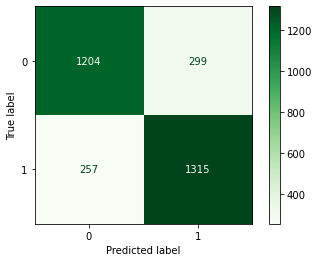

In [26]:
#Ask_transgender = 1, rainbow = 0
ConfusionMatrixDisplay.from_estimator(gs9, X_test, y_test, cmap='Greens');

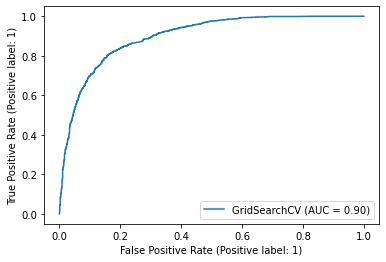

In [28]:
RocCurveDisplay.from_estimator(gs9, X_test, y_test);

**Observation:**
With this model above, I wanted to try the counvectorizer with simple Logistic Regression because there is no hyperparameter involved. Also noticing the best parameter was capping the countvectorization max at 90%. 


# MultinomialNB with Tfidf Vectorizer

In [34]:
#I am using the same split from above with different vectorizers
nbayes = MultinomialNB()

tfidf_vect = TfidfVectorizer(
    stop_words='english',
    max_features=1_000,
    ngram_range=(1,3)
)

#Using a pipeline to expedite the model with params
pipe2 = make_pipeline(
tfidf_vect,
nbayes
)

#Choice of params
params2 = {
"tfidfvectorizer__stop_words": ['english'],
"tfidfvectorizer__max_features": [10_000],
"tfidfvectorizer__ngram_range": [(1,2),(1,3)],
"multinomialnb__alpha":[2]
}
#Decided to do a gridsearch because I want to find the best model possible
gs2 = GridSearchCV(pipe2, params2, n_jobs=-1)

#Fitting the model
gs2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(max_features=1000,
                                                        ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'multinomialnb__alpha': [2],
                         'tfidfvectorizer__max_features': [10000],
                         'tfidfvectorizer__ngram_range': [(1, 2), (1, 3)],
                         'tfidfvectorizer__stop_words': ['english']})

In [35]:
gs2.cv_results_

pd.DataFrame(gs2.cv_results_).loc[:,['params', 'mean_test_score']].sort_values(by='mean_test_score')

,params,mean_test_score
1,"{'multinomialnb__alpha': 2, 'tfidfvectorizer__...",0.823722
0,"{'multinomialnb__alpha': 2, 'tfidfvectorizer__...",0.823939


In [36]:
gs2.score(X_test, y_test)

0.8120325203252032

In [37]:
gs2.best_params_

{'multinomialnb__alpha': 2,
 'tfidfvectorizer__max_features': 10000,
 'tfidfvectorizer__ngram_range': (1, 2),
 'tfidfvectorizer__stop_words': 'english'}

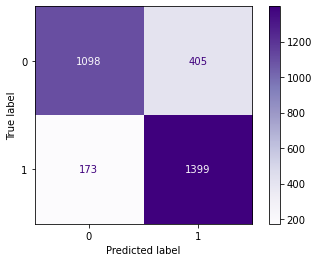

In [39]:
#Ask_transgender = 1, rainbow = 0
ConfusionMatrixDisplay.from_estimator(gs2, X_test, y_test, cmap='Purples');

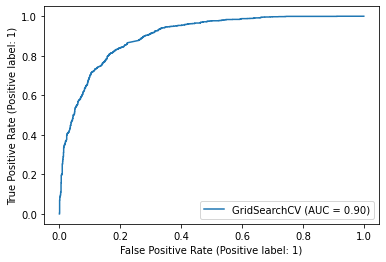

In [40]:
#Ask_transgender = 1, rainbow = 0
RocCurveDisplay.from_estimator(gs2, X_test, y_test);

**Observations:**
Within this model, I have noticed with the false negatives of the confusion display matrix are the lowest through out these models. 

# Tfidvectorizer Logistic Regression with Hyperparameter

In [41]:
#Using a pipeline to expedite the model with params
pipe6 = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression(max_iter=10_000)
)

#Choice of params
params6 = {
"tfidfvectorizer__stop_words": [None, 'english'],
"tfidfvectorizer__max_features": [1_000],
"tfidfvectorizer__ngram_range": [(1,1), (1,2), (1,3)],
"logisticregression__C": [10, 100] 
}
#Decided to do a gridsearch because I want to find the best model possible
gs6 = GridSearchCV(pipe6, params6, n_jobs=-1)

#Fitting the model
gs6.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [10, 100],
                         'tfidfvectorizer__max_features': [1000],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)],
                         'tfidfvectorizer__stop_words': [None, 'english']})

In [42]:
gs6.cv_results_

pd.DataFrame(gs6.cv_results_).loc[:, ['params', 'mean_test_score']].sort_values(by='mean_test_score')

,params,mean_test_score
10,"{'logisticregression__C': 100, 'tfidfvectorize...",0.800088
11,"{'logisticregression__C': 100, 'tfidfvectorize...",0.801388
9,"{'logisticregression__C': 100, 'tfidfvectorize...",0.801604
8,"{'logisticregression__C': 100, 'tfidfvectorize...",0.801931
7,"{'logisticregression__C': 100, 'tfidfvectorize...",0.803013
2,"{'logisticregression__C': 10, 'tfidfvectorizer...",0.809844
6,"{'logisticregression__C': 100, 'tfidfvectorize...",0.810169
4,"{'logisticregression__C': 10, 'tfidfvectorizer...",0.810170
3,"{'logisticregression__C': 10, 'tfidfvectorizer...",0.811253
5,"{'logisticregression__C': 10, 'tfidfvectorizer...",0.812229


In [43]:
#Testing Accuracy Score
gs6.score(X_test, y_test)

0.8136585365853658

In [44]:
gs6.best_params_

{'logisticregression__C': 10,
 'tfidfvectorizer__max_features': 1000,
 'tfidfvectorizer__ngram_range': (1, 1),
 'tfidfvectorizer__stop_words': None}

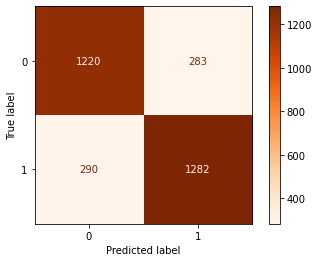

In [46]:
#Ask_transgender = 1, rainbow = 0
ConfusionMatrixDisplay.from_estimator(gs6, X_test, y_test, cmap='Oranges');

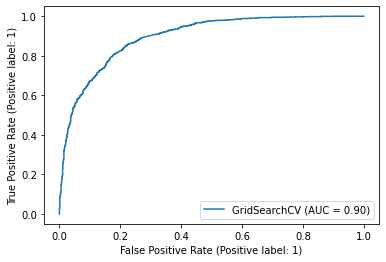

In [47]:
RocCurveDisplay.from_estimator(gs6, X_test, y_test);

**Observations**
Within this model, I have noticed the hyperparameter of the Logistic Regression that played a good role in have the accuracy stay within the 80's from all the trials it the model ran through. 

# Tfidfvectorizer with Bagging Classifier

In [2]:
#Using a pipeline to expedite the model with params
pipe5 = make_pipeline(
TfidfVectorizer(),
BaggingClassifier()
)

#Choice of params
params5 = {
"tfidfvectorizer__stop_words": [None, 'english'],
"tfidfvectorizer__max_features": [10_000],
"tfidfvectorizer__ngram_range": [(1,1), (1,2), (2,2), (1,3)],
}

#Decided to do a gridsearch because I want to find the best model possible
gs5_bag = GridSearchCV(pipe5, params5, n_jobs=-1)

#Fitting the model
gs5_bag.fit(X_train, y_train)

NameError: name 'make_pipeline' is not defined

In [50]:
gs5_bag.cv_results_

pd.DataFrame(gs5_bag.cv_results_).loc[:, ['params', 'mean_test_score']].sort_values(by='mean_test_score')

,params,mean_test_score
5,"{'tfidfvectorizer__max_features': 10000, 'tfid...",0.625326
4,"{'tfidfvectorizer__max_features': 10000, 'tfid...",0.717801
6,"{'tfidfvectorizer__max_features': 10000, 'tfid...",0.783066
2,"{'tfidfvectorizer__max_features': 10000, 'tfid...",0.784258
0,"{'tfidfvectorizer__max_features': 10000, 'tfid...",0.785776
1,"{'tfidfvectorizer__max_features': 10000, 'tfid...",0.794123
3,"{'tfidfvectorizer__max_features': 10000, 'tfid...",0.796942
7,"{'tfidfvectorizer__max_features': 10000, 'tfid...",0.799761


In [51]:
gs5_bag.score(X_test, y_test)

0.7990243902439025

In [52]:
gs5_bag.best_params_

{'tfidfvectorizer__max_features': 10000,
 'tfidfvectorizer__ngram_range': (1, 3),
 'tfidfvectorizer__stop_words': 'english'}

In [1]:
#Ask_transgender = 1, rainbow = 0
ConfusionMatrixDisplay.from_estimator(gs5_bag, X_test, y_test, cmap='Greys', display_labels=['r/ainbow', 'asktransgender']);

NameError: name 'ConfusionMatrixDisplay' is not defined

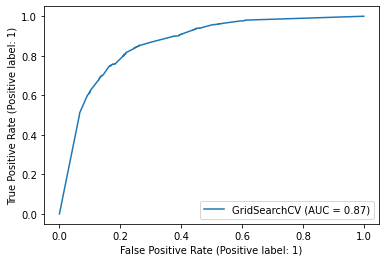

In [58]:
RocCurveDisplay.from_estimator(gs5_bag, X_test, y_test);

**Observations**
This model is one of the poor ones I consider because out of my top models, this is the lowest scoring. I did not include my low scoring models. My lowest model out of the 10 I have created was 52.4% which is significantly close to my null model. 

From creating all these models, I noticed that the scores are close to another regardless if I tried using the other feature of the 'text' from the subreddits. 

# Lemmatizer with Logistic Regression

In [377]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [379]:
class LemmaTokenizer():
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [  self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [380]:
lemmatizer = WordNetLemmatizer()
vect_lemmas = CountVectorizer(max_features=500, tokenizer=LemmaTokenizer())

X_train_lemmas = vect_lemmas.fit_transform(X_train)
X_test_lemmas = vect_lemmas.transform(X_test)

In [383]:
lr = LogisticRegression(max_iter=10_000, random_state=11)
lr.fit(X_train_lemmas, y_train)
lr.score(X_test_lemmas, y_test)

0.816910569105691

**Observation:**
Without using gridsearch to maximize my possibilities of higher scores in accuracy, it is good to know with my data even with the Lemmatizer that my models score is 
82%. This is still good news as it beat my null model.

In [ ]:
#    display_labels=['benign', 'malignant']


# Created Vocabulary

In [382]:
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=1_000, ngram_range=(1,2), )

X_train_transformed = tfidf_vect.fit_transform(X_train)
X_train_transformed

X_train_transformed.A

vocab = tfidf_vect.get_feature_names_out()
vocab

array(['10', '17', '18', '19', '1st', '20', '2020', '2021', '2022', '21',
       '22', '24', '25', '27', '30', 'able', 'accept', 'acceptance',
       'accepting', 'accidentally', 'ace', 'act', 'activist', 'actual',
       'actually', 'add', 'administration', 'advice', 'afab', 'affect',
       'affirming', 'afraid', 'agab', 'age', 'ago', 'aids', 'ainbow',
       'allowed', 'ally', 'amab', 'amazing', 'amazon', 'america', 'amp',
       'answer', 'answers', 'anti', 'anti lgbtq', 'anti trans', 'anxiety',
       'anybody', 'anymore', 'app', 'apparently', 'appreciate', 'area',
       'aren', 'arguments', 'art', 'article', 'artist', 'artists',
       'asexual', 'ask', 'asked', 'asking', 'assigned', 'attack',
       'attention', 'attracted', 'attraction', 'awareness', 'away',
       'baby', 'bad', 'ban', 'band', 'based', 'basic', 'beautiful',
       'believe', 'best', 'best friend', 'best way', 'better', 'bi',
       'biden', 'big', 'binary', 'binary people', 'binder', 'biological',
       'bir